# Map of homes per adult

California ranks last in homes per adult. This shows that metric by Census tract using the `cenpy` package.

## Setup

In [1]:
import cenpy
import matplotlib.pyplot as plt
import microdf as mdf
import contextily
import pandas as pd
import numpy as np

In [2]:
mdf.set_plot_style()

In [3]:
acs = cenpy.products.ACS(2018)

## Load data

See Appendix for how to find these.

In [4]:
FIELDS = {'B25001_001E': 'housing_units',
          'B01003_001E': 'population'}

In [5]:
sf = acs.from_place('San Francisco, CA',
                    variables=list(FIELDS.keys()))

Matched: San Francisco, CA to San Francisco city within layer Incorporated Places


In [6]:
oxnard = acs.from_place('Oxnard, CA',
                        variables=list(FIELDS.keys()))

Matched: Oxnard, CA to Oxnard city within layer Incorporated Places


In [7]:
ca = acs.from_state('CA',
                    variables=list(FIELDS.keys()))

In [8]:
vc = acs.from_county('Ventura County, CA',
                     variables=list(FIELDS.keys()))

## Plot

In [9]:
def plot_map(acs_data):
    acs_data.rename(FIELDS, axis=1, inplace=True)
    acs_data['housing_units_pp'] = np.minimum(
        1, acs_data.eval('housing_units / population'))
    ax = acs_data.plot('housing_units_pp', cmap='plasma', lw=0, legend=True)
    ax.axis('off')
    plt.title('Housing units per capita')
    plt.show()

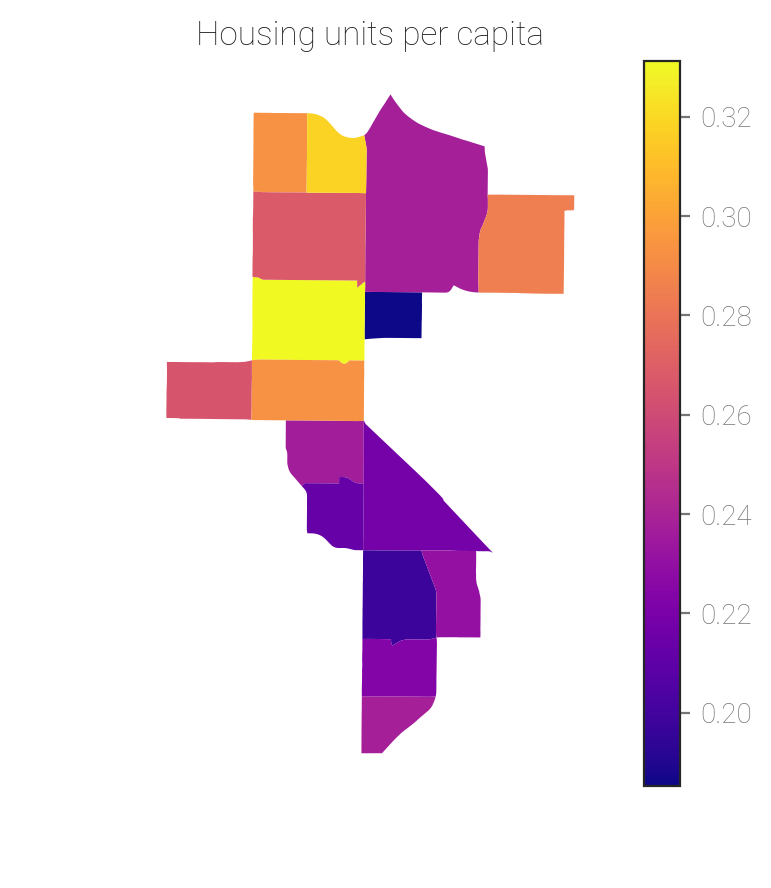

In [10]:
plot_map(oxnard)

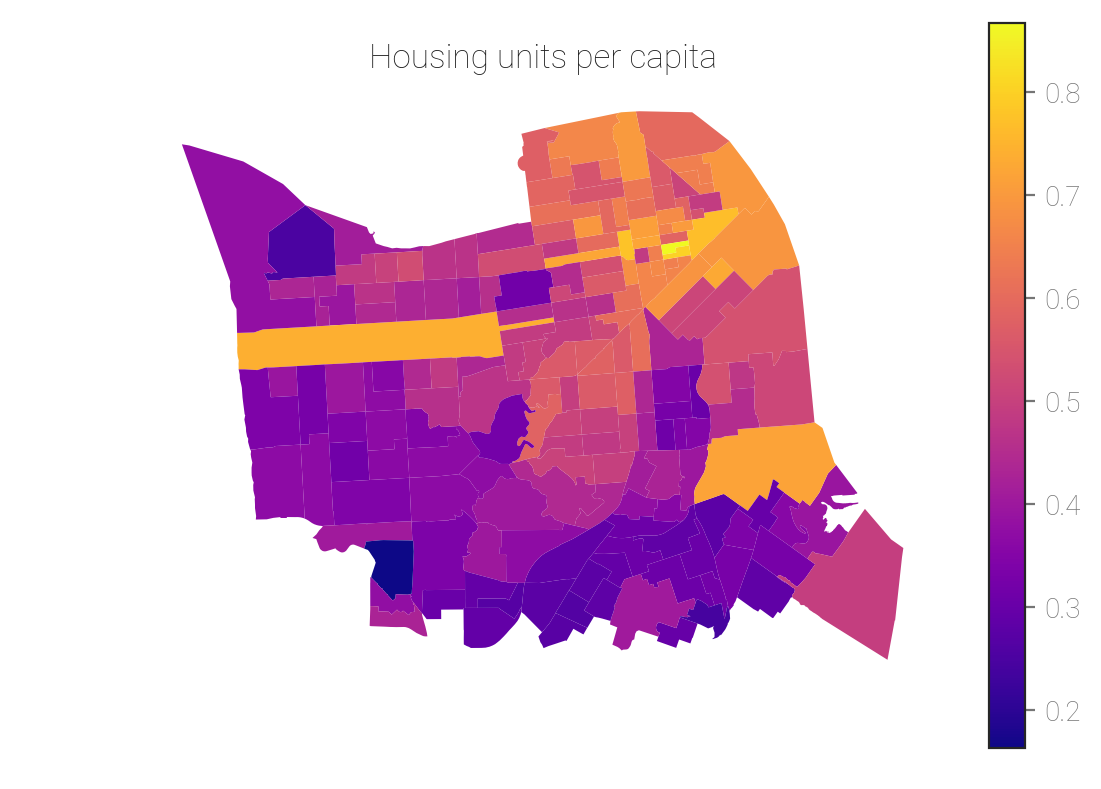

In [11]:
plot_map(sf)

/home/mghenis/miniconda3/lib/python3.7/site-packages/matplotlib/colors.py:504: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


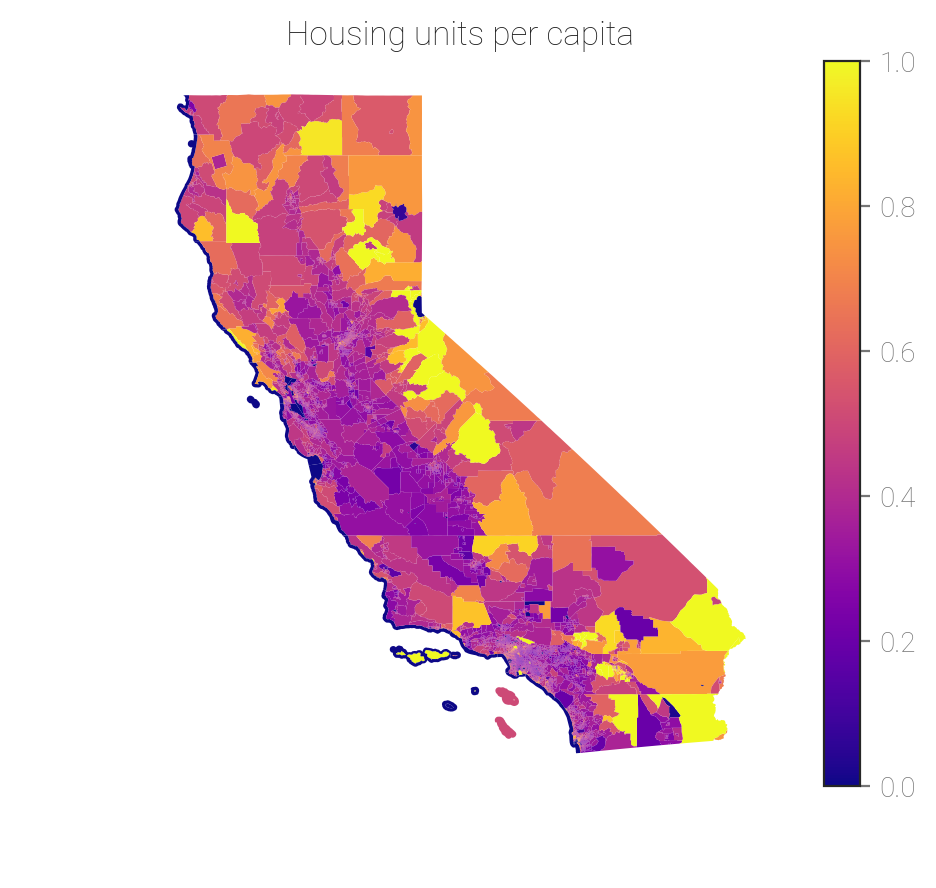

In [12]:
plot_map(ca)

/home/mghenis/miniconda3/lib/python3.7/site-packages/matplotlib/colors.py:504: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


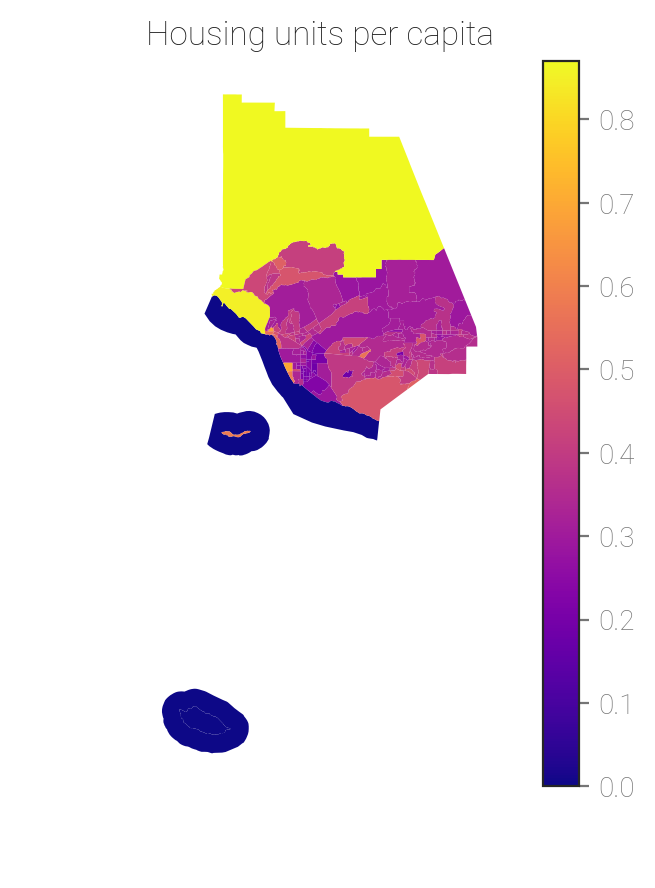

In [13]:
plot_map(vc)

## Appendix

### Appendix A: Finding relevant fields

In [15]:
acs.filter_tables('VACANCY', by='description')

,description,columns
table_name,,
B25004,VACANCY STATUS,"[B25004_001E, B25004_002E, B25004_003E, B25004..."
B99253,ALLOCATION OF VACANCY STATUS,"[B99253_001E, B99253_002E, B99253_003E]"


In [16]:
acs.filter_variables('B25004')

,label,concept,predicateType,group,limit,predicateOnly,attributes,required
B25004_005E,"Estimate!!Total!!Sold, not occupied",VACANCY STATUS,int,B25004,0,NaN,"B25004_005M,B25004_005MA,B25004_005EA",NaN
B25004_006E,"Estimate!!Total!!For seasonal, recreational, o...",VACANCY STATUS,int,B25004,0,NaN,"B25004_006M,B25004_006MA,B25004_006EA",NaN
B25004_004E,Estimate!!Total!!For sale only,VACANCY STATUS,int,B25004,0,NaN,"B25004_004M,B25004_004MA,B25004_004EA",NaN
B25004_003E,"Estimate!!Total!!Rented, not occupied",VACANCY STATUS,int,B25004,0,NaN,"B25004_003M,B25004_003MA,B25004_003EA",NaN
B25004_002E,Estimate!!Total!!For rent,VACANCY STATUS,int,B25004,0,NaN,"B25004_002M,B25004_002MA,B25004_002EA",NaN
B25004_001E,Estimate!!Total,VACANCY STATUS,int,B25004,0,NaN,"B25004_001M,B25004_001MA,B25004_001EA",NaN
B25004_008E,Estimate!!Total!!Other vacant,VACANCY STATUS,int,B25004,0,NaN,"B25004_008M,B25004_008MA,B25004_008EA",NaN
B25004_007E,Estimate!!Total!!For migrant workers,VACANCY STATUS,int,B25004,0,NaN,"B25004_007M,B25004_007MA,B25004_007EA",NaN


In [17]:
acs.filter_tables('HOUSING UNITS', by='description')

,description,columns
table_name,,
B00002,UNWEIGHTED SAMPLE HOUSING UNITS,[B00002_001E]
B25001,HOUSING UNITS,[B25001_001E]
B25008,TOTAL POPULATION IN OCCUPIED HOUSING UNITS BY ...,"[B25008_001E, B25008_002E, B25008_003E]"
B25010,AVERAGE HOUSEHOLD SIZE OF OCCUPIED HOUSING UNI...,"[B25010_001E, B25010_002E, B25010_003E]"
B25026,TOTAL POPULATION IN OCCUPIED HOUSING UNITS BY ...,"[B25026_001E, B25026_002E, B25026_003E, B25026..."
B25033,TOTAL POPULATION IN OCCUPIED HOUSING UNITS BY ...,"[B25033_001E, B25033_002E, B25033_003E, B25033..."
B25047,PLUMBING FACILITIES FOR ALL HOUSING UNITS,"[B25047_001E, B25047_002E, B25047_003E]"
B25048,PLUMBING FACILITIES FOR OCCUPIED HOUSING UNITS,"[B25048_001E, B25048_002E, B25048_003E]"
B25051,KITCHEN FACILITIES FOR ALL HOUSING UNITS,"[B25051_001E, B25051_002E, B25051_003E]"


`B25001_001E` looks right.

In [18]:
acs.filter_variables('B25001_001E')

,label,concept,predicateType,group,limit,predicateOnly,attributes,required
B25001_001E,Estimate!!Total,HOUSING UNITS,int,B25001,0,NaN,"B25001_001M,B25001_001MA,B25001_001EA",NaN


Now adults.

In [19]:
acs.filter_tables('AGE', by='description').description.sample(10)

table_name
B10001    GRANDCHILDREN UNDER 18 YEARS LIVING WITH A GRA...
C21007    AGE BY VETERAN STATUS BY POVERTY STATUS IN THE...
B05014           SEX BY AGE FOR THE FOREIGN-BORN POPULATION
B21005    AGE BY VETERAN STATUS BY EMPLOYMENT STATUS FOR...
B16004    AGE BY LANGUAGE SPOKEN AT HOME BY ABILITY TO S...
B08501    MEANS OF TRANSPORTATION TO WORK BY AGE FOR WOR...
B25128    TENURE BY AGE OF HOUSEHOLDER BY YEAR HOUSEHOLD...
B26213    GROUP QUARTERS TYPE (5 TYPES) BY LANGUAGE SPOK...
B06002    MEDIAN AGE BY PLACE OF BIRTH IN THE UNITED STATES
B25126    TENURE BY AGE OF HOUSEHOLDER BY YEAR STRUCTURE...
Name: description, dtype: object

In [20]:
acs.filter_tables('POPULATION', by='description').description

table_name
B00001            UNWEIGHTED SAMPLE COUNT OF THE POPULATION
B01003                                     TOTAL POPULATION
B05006    PLACE OF BIRTH FOR THE FOREIGN-BORN POPULATION...
B05007    PLACE OF BIRTH BY YEAR OF ENTRY BY CITIZENSHIP...
B05008    SEX BY PLACE OF BIRTH BY YEAR OF ENTRY FOR THE...
                                ...                        
C24030    SEX BY INDUSTRY FOR THE CIVILIAN EMPLOYED POPU...
C24040    SEX BY INDUSTRY FOR THE FULL-TIME, YEAR-ROUND ...
C24050    INDUSTRY BY OCCUPATION FOR THE CIVILIAN  EMPLO...
C24060    OCCUPATION BY CLASS OF WORKER FOR THE CIVILIAN...
C24070    INDUSTRY BY CLASS OF WORKER FOR THE CIVILIAN E...
Name: description, Length: 142, dtype: object

In [21]:
acs.filter_variables('B01003')

,label,concept,predicateType,group,limit,predicateOnly,attributes,required
B01003_001E,Estimate!!Total,TOTAL POPULATION,int,B01003,0,NaN,"B01003_001EA,B01003_001M,B01003_001MA",NaN


B01001 looks promising.

In [22]:
b01001_vars = acs.filter_variables('B01001')
b01001_vars = acs.filter_variables('B05009')
b01001_vars.label

B05009_008E    Estimate!!Total!!Under 6 years!!Living with tw...
B05009_009E    Estimate!!Total!!Under 6 years!!Living with tw...
B05009_006E    Estimate!!Total!!Under 6 years!!Living with tw...
B05009_007E    Estimate!!Total!!Under 6 years!!Living with tw...
B05009_004E    Estimate!!Total!!Under 6 years!!Living with tw...
B05009_005E    Estimate!!Total!!Under 6 years!!Living with tw...
B05009_001E                                      Estimate!!Total
B05009_003E    Estimate!!Total!!Under 6 years!!Living with tw...
B05009_002E                       Estimate!!Total!!Under 6 years
B05009_033E    Estimate!!Total!!6 to 17 years!!Living with on...
B05009_034E    Estimate!!Total!!6 to 17 years!!Living with on...
B05009_031E    Estimate!!Total!!6 to 17 years!!Living with on...
B05009_032E    Estimate!!Total!!6 to 17 years!!Living with on...
B05009_030E    Estimate!!Total!!6 to 17 years!!Living with tw...
B05009_036E    Estimate!!Total!!6 to 17 years!!Living with on...
B05009_035E    Estimate!!

Find it by label.

In [23]:
b01001_vars.label.unique()

array(['Estimate!!Total!!Under 6 years!!Living with two parents!!Both parents foreign born!!Child is native',
       'Estimate!!Total!!Under 6 years!!Living with two parents!!Both parents foreign born!!Child is foreign born',
       'Estimate!!Total!!Under 6 years!!Living with two parents!!Both parents native',
       'Estimate!!Total!!Under 6 years!!Living with two parents!!Both parents foreign born',
       'Estimate!!Total!!Under 6 years!!Living with two parents!!Child is native',
       'Estimate!!Total!!Under 6 years!!Living with two parents!!Child is foreign born',
       'Estimate!!Total',
       'Estimate!!Total!!Under 6 years!!Living with two parents',
       'Estimate!!Total!!Under 6 years',
       'Estimate!!Total!!6 to 17 years!!Living with one parent!!Child is foreign born',
       'Estimate!!Total!!6 to 17 years!!Living with one parent!!Native parent',
       'Estimate!!Total!!6 to 17 years!!Living with one parent',
       'Estimate!!Total!!6 to 17 years!!Living with one 